In [1]:
import os
import json
import pandas as pd
import math

# Directory containing all JSON files
json_files_directory = '.'


experiment_data_list = []
number_experimenters = 0

# Iterate through each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.startswith('interaction-data-') and filename.endswith('.json'):
        # Extract experimenter's name from the file name
        experimenter_name = filename.replace('interaction-data-', '').replace('.json', '')

        # Load JSON data for each experimenter
        with open(os.path.join(json_files_directory, filename)) as json_file:
            data = json.load(json_file)

        number_experimenters += 1
        experimenter_row = {'experimenter_name': experimenter_name}

        # Iterate through experiments for each experimenter
        for experiment_name, experiment_data in data['experiments'].items():
            # Extract relevant information
            duration = experiment_data['experimentDuration']
            click_count = experiment_data['clickCount']
            cursor_movement = len(experiment_data['mousePositions'])

            # Save data in the experimenter_row dictionary
            experimenter_row[f'{experiment_name}_duration'] = math.floor(duration/1000)
            experimenter_row[f'{experiment_name}_click_count'] = click_count
            experimenter_row[f'{experiment_name}_mouvement'] = cursor_movement

        # Append experimenter_row to experiment_data_list
        experiment_data_list.append(experimenter_row)

# Create a DataFrame from the list of experiment data
df = pd.DataFrame(experiment_data_list)

# Save DataFrame to CSV file
df.to_csv('experiment_data.csv', index=False)

In [2]:
df.mean(axis=0)

C:\Users\gmati\AppData\Local\Temp\ipykernel_11844\2681518468.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


experiment1_duration         6.000000
experiment1_click_count      1.333333
experiment1_mouvement      100.500000
experiment2_duration         5.333333
experiment2_click_count      1.000000
experiment2_mouvement       80.166667
experiment3_duration         8.833333
experiment3_click_count      1.833333
experiment3_mouvement      163.166667
experiment4_duration        17.500000
experiment4_click_count      5.833333
experiment4_mouvement      262.500000
experiment5_duration        10.000000
experiment5_click_count      3.166667
experiment5_mouvement      151.166667
experiment6_duration        33.666667
experiment6_click_count     12.500000
experiment6_mouvement      555.166667
experiment7_duration        38.166667
experiment7_click_count     11.500000
experiment7_mouvement      506.833333
dtype: float64

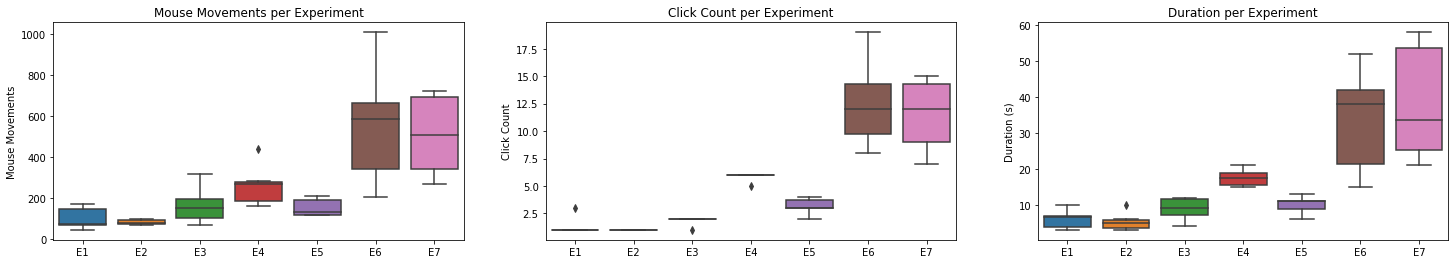

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv('experiment_data.csv')

# List of columns to plot
experiment_columns = [col for col in df.columns if 'mouvement' in col]
click_count_columns = [col for col in df.columns if 'click_count' in col]
duration_columns = [col for col in df.columns if 'duration' in col]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 4), sharex=True)

# Plot mouse movements
sns.boxplot(data=df[experiment_columns], ax=axs[0])
axs[0].set_ylabel('Mouse Movements')
axs[0].set_title('Mouse Movements per Experiment')

# Plot click count
sns.boxplot(data=df[click_count_columns], ax=axs[1])
axs[1].set_ylabel('Click Count')
axs[1].set_title('Click Count per Experiment')

# Plot duration
sns.boxplot(data=df[duration_columns], ax=axs[2])
axs[2].set_ylabel('Duration (s)')
axs[2].set_title('Duration per Experiment')

# Rename x-axis labels
plt.xticks(range(7), ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7'])

plt.show()
